<a href="https://colab.research.google.com/github/gbochkov/skillfactory_rds/blob/master/module_2/ds_unit4_pr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 4. Проект 2. Разведывательный анализ данных 

## Общая информация

Суть - отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска. Это можно сделать с помощью модели, которая предсказывала бы результаты государственного экзамена по математике для каждого учащегося в школе. Чтобы определить параметры будущей модели, мы проведем разведывательный анализ данных и составим отчет по его результатам.

### Импорт библиотек


In [0]:
# импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
# from google.colab import drive
# drive.mount('/drive')

### Определение функций

In [0]:
# определяем функции

In [0]:
def info01(dat):
    display(pd.DataFrame(dat.value_counts()))
    print(f"Тип поля: {dat.dtype}")
    print(f"Количество уникальных данных: {dat.nunique()}")
    print(f"Количество отсутствующих данных: {dat.isnull().sum()}")

In [0]:
def info02(dat):
    median = dat.median()
    IQR = dat.quantile(0.75) - dat.quantile(0.25)
    perc25 = dat.quantile(0.25)
    perc75 = dat.quantile(0.75)
    print('25-й перцентиль: {},'.format(perc25),
          '75-й перцентиль: {}, '.format(perc75), "IQR: {}, ".format(IQR),
          "Границы выбросов: [{f}, {l}].".format(f=perc25 -
                                                 1.5*IQR, l=perc75 + 1.5*IQR))
    dat.loc[dat.between(perc25 - 1.5*IQR, perc75 +
                        1.5*IQR)].hist(bins=10, range=(0, 10), label='IQR')
    plt.legend()

In [0]:
def get_stat_dif(df, column, goal_column, alpha=0.05):
    cols = df.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], goal_column],
                     df.loc[df.loc[:, column] == comb[1], goal_column],
                     nan_policy='omit').pvalue \
                <= alpha/len(combinations_all):  # Учли поправку Бонферони
            return True
            break
    return False


In [0]:
def stat_difference_analyse(df, columns, goal_column, alpha=0.05):
    stat_dif = []
    alpha = 0.05

    for col in nom_var:
        if get_stat_dif(df, col, 'score', alpha):
            stat_dif.append(col)

    if len(stat_dif):

        print(stat_dif)
    else:
        print('Cтатистически значимые отличия в колонках не найдены!')

In [0]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=stud_set.loc[stud_set.loc[:, column].
                                  isin(stud_set.loc[:, column])], ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

## Анализ датасета

### Загрузка данных

In [0]:
# загружаем данные
pd.set_option('display.max_rows', 50)  # выведем больше строк
pd.set_option('display.max_columns', 50)  # выведем больше колонок
# stud_set = pd.read_csv('/drive/My Drive/data/stud_math.csv')
stud_set = pd.read_csv('stud_math.csv')

In [0]:
stud_set.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


### Обзор датасета
<li>В датасете 395 строк, 30 столбцов</li>
<li>Большинство столбцов имеют незначительные пропуски</li> 
<li>Всего в датасете 97 строк без пропусков</li> 
<li>В датасете 13 числовых столбцов и 17 строковых</li> 
<li>Один столбец "studytime, granular" отсутствует в предваритеьном описании датасета</li>

In [0]:
print(f"Количество строк в датасете: {stud_set.shape[0]}")
print(f"Количество столбцов в датасете: {len(stud_set.columns)}")

Количество строк в датасете: 395
Количество столбцов в датасете: 30


In [0]:
# общая информация о датасете
stud_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

In [0]:
# оценка строк без пропусков
print(f"Cтрок без пропусков: {len(stud_set.dropna(axis = 0,how = 'any'))}")

Cтрок без пропусков: 97


In [0]:
# оценка типов данных в датасете
num_count = stud_set.select_dtypes(include=['float64', 'int64']).shape[1]
obj_count = stud_set.select_dtypes(include=['object']).shape[1]
print(f"Количество числовых столбцов: {num_count}")
print(f"Количество строковых столбцов: {obj_count}")

Количество числовых столбцов: 13
Количество строковых столбцов: 17


### Первичная обработка датасета

In [0]:
# переименовываем столбцы для удобства
stud_set.columns = ['school', 'sex', 'age', 'address', 'famsize', 'pstatus',
                    'medu', 'fedu', 'mjob', 'fjob', 'reason', 'guardian',
                    'traveltime', 'studytime', 'failures', 'schoolsup',
                    'famsup', 'paid', 'activities', 'nursery',
                    'studytime_granular', 'higher', 'internet', 'romantic',
                    'famrel', 'freetime', 'goout', 'health', 'absences',
                    'score']

Анализ по столбцам

<b>studytime,granular</b> (studytime_granular)
<li>cтолбец не представлен в описании</li> 
<li>показал полную обратную корреляцию с признаком studytime; столбец удален.</li>


In [0]:
stud_set.corr()

,age,medu,fedu,traveltime,studytime,failures,studytime_granular,famrel,freetime,goout,health,absences,score
age,1.000000,-0.161704,-0.138018,0.081508,-0.015556,0.228047,0.015556,0.068899,0.029023,0.135107,-0.065946,0.093592,-0.155726
medu,-0.161704,1.000000,0.275598,-0.173515,0.078589,-0.245463,-0.078589,-0.010050,0.025335,0.064164,-0.045051,-0.011944,0.213349
fedu,-0.138018,0.275598,1.000000,0.030646,0.057199,-0.150821,-0.057199,0.040577,-0.066556,-0.023282,0.027251,0.004695,0.078573
traveltime,0.081508,-0.173515,0.030646,1.000000,-0.102206,0.064699,0.102206,-0.016857,-0.021937,0.037636,-0.021531,-0.048215,-0.070559
studytime,-0.015556,0.078589,0.057199,-0.102206,1.000000,-0.178992,-1.000000,0.045894,-0.121969,-0.051280,-0.080016,-0.026544,0.115741
failures,0.228047,-0.245463,-0.150821,0.064699,-0.178992,1.000000,0.178992,-0.022655,0.098382,0.120914,0.081284,0.057391,-0.344338
studytime_granular,0.015556,-0.078589,-0.057199,0.102206,-1.000000,0.178992,1.000000,-0.045894,0.121969,0.051280,0.080016,0.026544,-0.115741
famrel,0.068899,-0.010050,0.040577,-0.016857,0.045894,-0.022655,-0.045894,1.000000,0.175743,0.081154,0.077474,-0.082609,0.057112
freetime,0.029023,0.025335,-0.066556,-0.021937,-0.121969,0.098382,0.121969,0.175743,1.000000,0.296437,0.061575,0.009292,0.019026
goout,0.135107,0.064164,-0.023282,0.037636,-0.051280,0.120914,0.051280,0.081154,0.296437,1.000000,-0.015608,-0.048738,-0.129685


In [0]:
stud_set[['studytime_granular', 'studytime']].corr()


,studytime_granular,studytime
studytime_granular,1.0,-1.0
studytime,-1.0,1.0


In [0]:
# удаляем столбец 'studytime_granular'
stud_set.drop(columns=['studytime_granular'], inplace=True)

<b>Количественные</b> параметры (age, score, absences)

<b>age</b> — (количественная переменная) возраст ученика (от 15 до 22)
<li>значения столбца имеют примерно нормальное распределение</li>
<li>пропусков и выбросов нет</li>


In [0]:
info01(stud_set.age)


,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


Тип поля: int64
Количество уникальных данных: 8
Количество отсутствующих данных: 0


count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

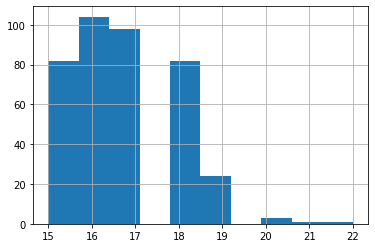

In [0]:
stud_set.age.hist()
stud_set.age.describe()


<b>score</b> — (количественная переменная) баллы по госэкзамену по математике
<li>значения в диапазоне от 0 до 100 соответствует предметной области</li>
<li>в столбце отсутствуют 6 значений, так как это целевая переменная и мы не можем восстановить данные, то принимаем решение удалить эти строки.</li>

In [0]:
info01(stud_set.score)

,score
50.0,54
55.0,46
0.0,37
75.0,33
65.0,31
40.0,31
60.0,31
70.0,27
45.0,27
80.0,16


Тип поля: float64
Количество уникальных данных: 18
Количество отсутствующих данных: 6


In [0]:
# удаляем строки датасета с пропущенными значениями 'score'
stud_set.dropna(subset=['score'], how='any', inplace=True)

<b>absences</b> — (количественная переменная) количество пропущенных занятий
<li>Содержит 12 пропущенных значений; пропуски заполним значением моды</li>
<li>Содержит потенциальные выбросы, которые почистим с помощью межквартильного интервала</li>
<li>Потенциально значения имеют экспонентциальный характер</li>

,absences
0.0,110
2.0,60
4.0,52
6.0,30
8.0,20
10.0,17
12.0,12
14.0,12
3.0,7
16.0,7


Тип поля: float64
Количество уникальных данных: 36
Количество отсутствующих данных: 11


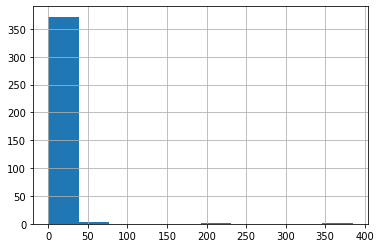

In [0]:
stud_set.absences.hist()
info01(stud_set.absences)

In [0]:
stud_set.absences.describe()
# Вычислим межквартильный интервал и границы допустимых значений

count    389.000000
mean       4.277635
std        4.951834
min        0.000000
25%        0.000000
50%        2.000000
75%        6.000000
max       20.000000
Name: absences, dtype: float64

25-й перцентиль: 0.0, 75-й перцентиль: 6.0,  IQR: 6.0,  Границы выбросов: [-9.0, 15.0].


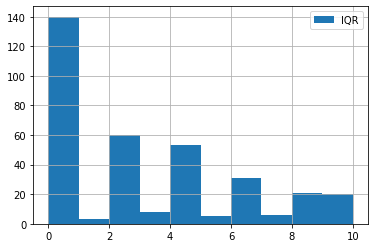

In [0]:
info02(stud_set.absences)
stud_set.absences.loc[(stud_set.absences < -12)] = np.nan
stud_set.absences.loc[(stud_set.absences > 20)] = np.nan

In [0]:
# заменям пропуски на значение моды
stud_set.absences = stud_set.absences.fillna(stud_set['absences'].mode()[0])

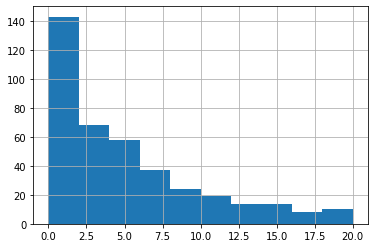

In [0]:
# гистограмма после удаления выбросов и замены пропусков
stud_set.absences.hist()


Номинативные параметры

Бинарные параметры

<b>yes/no</b> - (schoolsup, famsup, paid, activities, nursery, higher, internet, romantic)

In [0]:
# список бинарных параметров с вариантами yes/no
bin_list = ['schoolsup', 'famsup', 'paid', 'activities', 'nursery',
            'higher', 'internet', 'romantic']

<b>schoolsup</b> — (номинативная переменная) дополнительная образовательная поддержка (yes или no)
<li>необходимо обработать пропуски и перевести в бинарный вид</li>

In [0]:
info01(stud_set.schoolsup)

,schoolsup
no,331
yes,49


Тип поля: object
Количество уникальных данных: 2
Количество отсутствующих данных: 9


<b>famsup</b> — (номинативная переменная) семейная образовательная поддержка (yes или no)
<li>необходимо обработать пропуски и перевести в бинарный вид</li>

In [0]:
info01(stud_set.famsup)

,famsup
yes,216
no,135


Тип поля: object
Количество уникальных данных: 2
Количество отсутствующих данных: 38


<b>paid</b> — (номинативная переменная) дополнительные платные занятия по математике (yes или no)
<li>необходимо обработать пропуски и перевести в бинарный вид</li>

In [0]:
info01(stud_set.paid)

,paid
no,197
yes,153


Тип поля: object
Количество уникальных данных: 2
Количество отсутствующих данных: 39



<b>activities</b> — (номинативная переменная) дополнительные внеучебные занятия (yes или no)
<li>необходимо обработать пропуски и перевести в бинарный вид</li>

In [0]:
info01(stud_set.activities)

,activities
yes,192
no,183


Тип поля: object
Количество уникальных данных: 2
Количество отсутствующих данных: 14


<b>nursery</b> — (номинативная переменная) посещал детский сад (yes или no)
<li>необходимо обработать пропуски и перевести в бинарный вид</li>

In [0]:
info01(stud_set.nursery)

,nursery
yes,297
no,77


Тип поля: object
Количество уникальных данных: 2
Количество отсутствующих данных: 15



<b>higher</b> — (номинативная переменная) хочет получить высшее образование (yes или no)
<li>необходимо обработать пропуски и перевести в бинарный вид</li>

In [0]:
info01(stud_set.higher)

,higher
yes,350
no,19


Тип поля: object
Количество уникальных данных: 2
Количество отсутствующих данных: 20


<b>internet</b> — (номинативная переменная) наличие интернета дома (yes или no)
<li>необходимо обработать пропуски и перевести в бинарный вид</li>

In [0]:
info01(stud_set.internet)

,internet
yes,300
no,55


Тип поля: object
Количество уникальных данных: 2
Количество отсутствующих данных: 34


<b>romantic</b> — (номинативная переменная) в романтических отношениях (yes или no)
<li>необходимо обработать пропуски и перевести в бинарный вид</li>

In [0]:
info01(stud_set.romantic)

,romantic
no,235
yes,123


Тип поля: object
Количество уникальных данных: 2
Количество отсутствующих данных: 31


In [0]:
stud_set[bin_list].describe()

,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,380,351,350,375,374,369,355,358
unique,2,2,2,2,2,2,2,2
top,no,yes,no,yes,yes,yes,yes,no
freq,331,216,197,192,297,350,300,235


In [0]:
# заменим пропуски константой 'NO' и переведем в бинарный вид
for col in bin_list:
    stud_set[col].fillna('no', inplace=True)
    stud_set[col].replace('yes', 1, inplace=True)
    stud_set[col].replace('no', 0, inplace=True)

In [0]:
# проверим заполненность столбцов значениями
stud_set[bin_list].count()

schoolsup     389
famsup        389
paid          389
activities    389
nursery       389
higher        389
internet      389
romantic      389
dtype: int64


<b>Прочие бинарные</b> параметры (sex, address, school, famsize, pstatus)

<b>sex</b> — (номинативная переменная) пол ученика ('F' - женский, 'M' - мужской)

In [0]:
info01(stud_set.sex)

,sex
F,204
M,185


Тип поля: object
Количество уникальных данных: 2
Количество отсутствующих данных: 0


<b>address</b>— (номинативная переменная) тип адреса ученика ('U' - городской, 'R' - за городом)
<li>незначительные пропуски заполним доминирующим значением переменной</li>

In [0]:
info01(stud_set.address)

,address
U,291
R,83


Тип поля: object
Количество уникальных данных: 2
Количество отсутствующих данных: 15


In [0]:
stud_set['address'].fillna('U', inplace=True)

<b>school</b> — (номинативная переменная) аббревиатура школы, в которой учится ученик

In [0]:
info01(stud_set.school)

,school
GP,344
MS,45


Тип поля: object
Количество уникальных данных: 2
Количество отсутствующих данных: 0


<b>famsize</b> — (номинативная переменная) размер семьи('LE3' <= 3, 'GT3' >3<)
<li>незначительные пропуски заполним доминирующим значением переменной</li>

In [0]:
info01(stud_set.famsize)


,famsize
GT3,255
LE3,107


Тип поля: object
Количество уникальных данных: 2
Количество отсутствующих данных: 27


In [0]:
stud_set['famsize'].fillna('GT3', inplace=True)

<b>Pstatus</b> — (номинативная переменная) статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
<li>пропуски заполним доминирующим значением переменной</li>

In [0]:
info01(stud_set.pstatus)

,pstatus
T,308
A,36


Тип поля: object
Количество уникальных данных: 2
Количество отсутствующих данных: 45


In [0]:
stud_set['pstatus'].fillna('T', inplace=True)

<b>Ранговые</b> параметры (medu, fedu, mjob, fjob, reason, guardian, traveltime, studytime, failures, famrel, freetime, goout, health)

<b>Medu</b> — (ранговая переменная) образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
<li>пропуски заполним значением медианы</li>

In [0]:
info01(stud_set.medu)

,medu
4.0,131
2.0,100
3.0,96
1.0,56
0.0,3


Тип поля: float64
Количество уникальных данных: 5
Количество отсутствующих данных: 3


In [0]:
stud_set['medu'] = stud_set['medu'].fillna(stud_set['medu'].median())

<b>Fedu</b> — (ранговая переменная) образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
<li>поле содержит явный выброс со значением 40; видимо была допущена ошибка - введен лишний 0; значение скорректировано</li>


In [0]:
info01(stud_set.fedu)

,fedu
2.0,105
3.0,94
4.0,88
1.0,75
0.0,2
40.0,1


Тип поля: float64
Количество уникальных данных: 6
Количество отсутствующих данных: 24


In [0]:
stud_set.loc[stud_set.fedu > 4]

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
11,GP,F,15,U,GT3,T,2.0,40.0,services,other,reputation,father,3.0,3.0,0.0,0,1,0,1,1,1,1,0,5.0,2.0,2.0,4.0,4.0,60.0


In [0]:
stud_set.loc[11, 'fedu'] = 4

<b>Mjob</b> — (номинативная переменная) работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
<li>отсутствующие значение заменим значением 'other'</li>

In [0]:
info01(stud_set.mjob)

,mjob
other,127
services,98
at_home,58
teacher,55
health,32


Тип поля: object
Количество уникальных данных: 5
Количество отсутствующих данных: 19


In [0]:
# отсутствующие значение заменим значением 'other'
stud_set['mjob'].fillna('other', inplace=True)

<b>Fjob</b> — (номинативная переменная) работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
<li>отсутствующие значение заменим значением 'other'</li>

In [0]:
info01(stud_set.fjob)

,fjob
other,194
services,99
teacher,29
at_home,16
health,15


Тип поля: object
Количество уникальных данных: 5
Количество отсутствующих данных: 36


In [0]:
# отсутствующие значение заменим значением 'other'
stud_set['fjob'].fillna('other', inplace=True)

<b>reason</b> — (номинативная переменная) причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
<li>отсутствующие значение заменим значением 'other'</li>

,reason
course,135
reputation,102
home,101
other,34


Тип поля: object
Количество уникальных данных: 4
Количество отсутствующих данных: 17


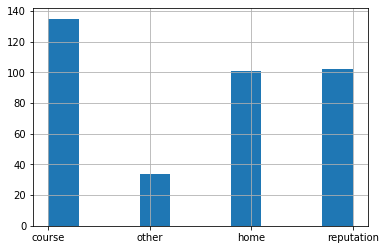

In [0]:
stud_set.reason.hist()
info01(stud_set.reason)

In [0]:
# отсутствующие значение заменим значением 'other'
stud_set['reason'].fillna('other', inplace=True)

<b>guardian</b> — (номинативная переменная) опекун ('mother' - мать, 'father' - отец, 'other' - другое)
<li>отсутствующие значение заменим значением 'other'</li>

,guardian
mother,248
father,86
other,24


Тип поля: object
Количество уникальных данных: 3
Количество отсутствующих данных: 31


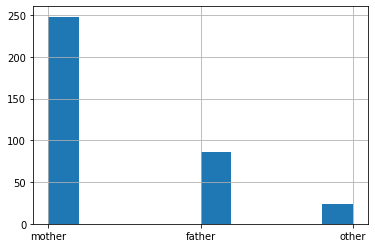

In [0]:
stud_set.guardian.hist()
info01(stud_set.guardian)

In [0]:
# отсутствующие значение заменим значением 'other'
stud_set['guardian'].fillna('other', inplace=True)

<b>traveltime</b> — (ранговая переменная) время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
<li>пропуски заменим значением медианы</li>

,traveltime
1.0,239
2.0,94
3.0,21
4.0,7


Тип поля: float64
Количество уникальных данных: 4
Количество отсутствующих данных: 28


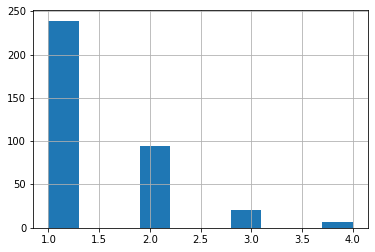

In [0]:
stud_set.traveltime.hist()
info01(stud_set.traveltime)

In [0]:
# пропуски заменим значением медианы
stud_set['traveltime'] = stud_set['traveltime'].fillna(
                         stud_set['traveltime'].median())

<b>studytime</b> — (ранговая переменная) время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
<li>пропуски заменим значением медианы</li>


,studytime
2.0,189
1.0,103
3.0,63
4.0,27


Тип поля: float64
Количество уникальных данных: 4
Количество отсутствующих данных: 7


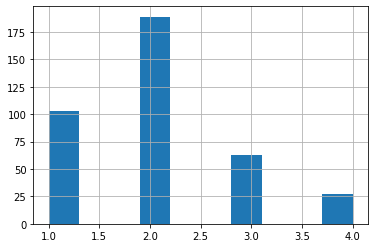

In [0]:
stud_set.studytime.hist()
info01(stud_set.studytime)

In [0]:
# пропуски заменим значением медианы
stud_set['studytime'] = stud_set['studytime'].fillna(
                        stud_set['studytime'].median())

<b>failures</b> — (ранговая переменная) количество внеучебных неудач (n, если 1<=n<3, иначе 4)
<li>пропуски заполним константой (доминирующим значением) '0'</li>
<li>описание столбца некорректно, иначе в столбце очень много выбросов</li>

,failures
0.0,290
1.0,48
2.0,15
3.0,14


Тип поля: float64
Количество уникальных данных: 4
Количество отсутствующих данных: 22


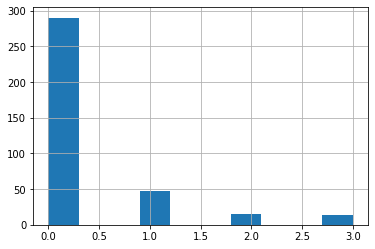

In [0]:
stud_set.failures.hist()
info01(stud_set.failures)

In [0]:
# пропуски заполним константой (доминирующим значением) '0'
stud_set['failures'].fillna(0, inplace=True)

<b>famrel</b> — (ранговая переменная) семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
<li>в данных присутствует значение "-1.0"; ошибочное значение, возможно случайно поставлен "-"; значение скорректировано.</li>
<li>пропуски заменим значением медианы</li>

,famrel
4.0,178
5.0,97
3.0,62
2.0,17
1.0,7
-1.0,1


Тип поля: float64
Количество уникальных данных: 6
Количество отсутствующих данных: 27


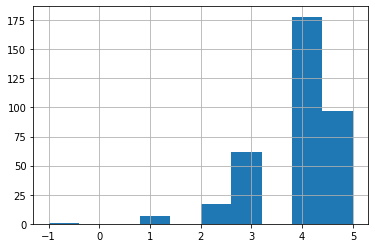

In [0]:
stud_set.famrel.hist()
info01(stud_set.famrel)

In [0]:
stud_set[stud_set.famrel < 1]

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
25,GP,F,16,U,GT3,T,2.0,2.0,services,services,home,mother,1.0,1.0,2.0,0,1,1,0,0,1,1,0,-1.0,2.0,2.0,5.0,14.0,40.0


In [0]:
# корректируем ошибочное значение
stud_set.loc[25, 'famrel'] = 1

In [0]:
# заменяем пропуски значением медианы
stud_set['famrel'] = stud_set['famrel'].fillna(stud_set['famrel'].median())

<b>freetime</b> — (ранговая переменная) свободное время после школы (от 1 - очень мало до 5 - очень мого)
<li>пропуски заменим значением медианы</li>

,freetime
3.0,152
4.0,110
2.0,63
5.0,37
1.0,18


Тип поля: float64
Количество уникальных данных: 5
Количество отсутствующих данных: 9


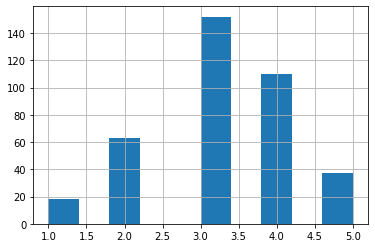

In [0]:
stud_set.freetime.hist()
info01(stud_set.freetime)

In [0]:
# заполним пропуски значением медианы
median = stud_set['freetime'].median()
stud_set['freetime'] = stud_set['freetime'].fillna(median)

<b>goout</b> — (ранговая переменная) проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
<li>пропуски заменим значением медианы</li>

,goout
3.0,126
2.0,101
4.0,81
5.0,51
1.0,23


Тип поля: float64
Количество уникальных данных: 5
Количество отсутствующих данных: 7


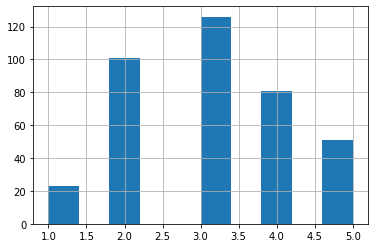

In [0]:
stud_set.goout.hist()
info01(stud_set.goout)

In [0]:
stud_set['goout'] = stud_set['goout'].fillna(stud_set['goout'].median())

<b>health</b> — (ранговая переменная) текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
<li>пропуски заменим значением медианы</li>

,health
5.0,137
3.0,88
4.0,60
1.0,47
2.0,42


Тип поля: float64
Количество уникальных данных: 5
Количество отсутствующих данных: 15


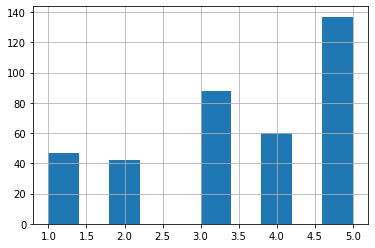

In [0]:
stud_set.health.hist()
info01(stud_set.health)

In [0]:
median = stud_set['health'].median()
stud_set['health'] = stud_set['health'].fillna(median)

<b>Выводы по первичной обработке данных</b>

Проведенная первичная обработка показала, что датасет содержит 29 переменных, из них 3 - количественные, 9 - ранговых и 17 номинативных.  

Данные чистые, изменения внесены лишь в очень небольшое количество записей: [fedu] - лишний ноль в 1 записи, [famrel] - ошибочный знак минус, [absences] - два аномальных выброса, [failures] - ошибка в описании, удалён 1 столбец [studytime, granular] из-за полной корреляции с [studytime].

### Корреляционный анализ числовых (количественные и ранговые) переменных

Выясним, какие столбцы коррелируют с целевым параметром ('score'). Это поможет понять, какие параметры стоит оставить для модели, а какие — исключить. 

Построим графики для числох переменных

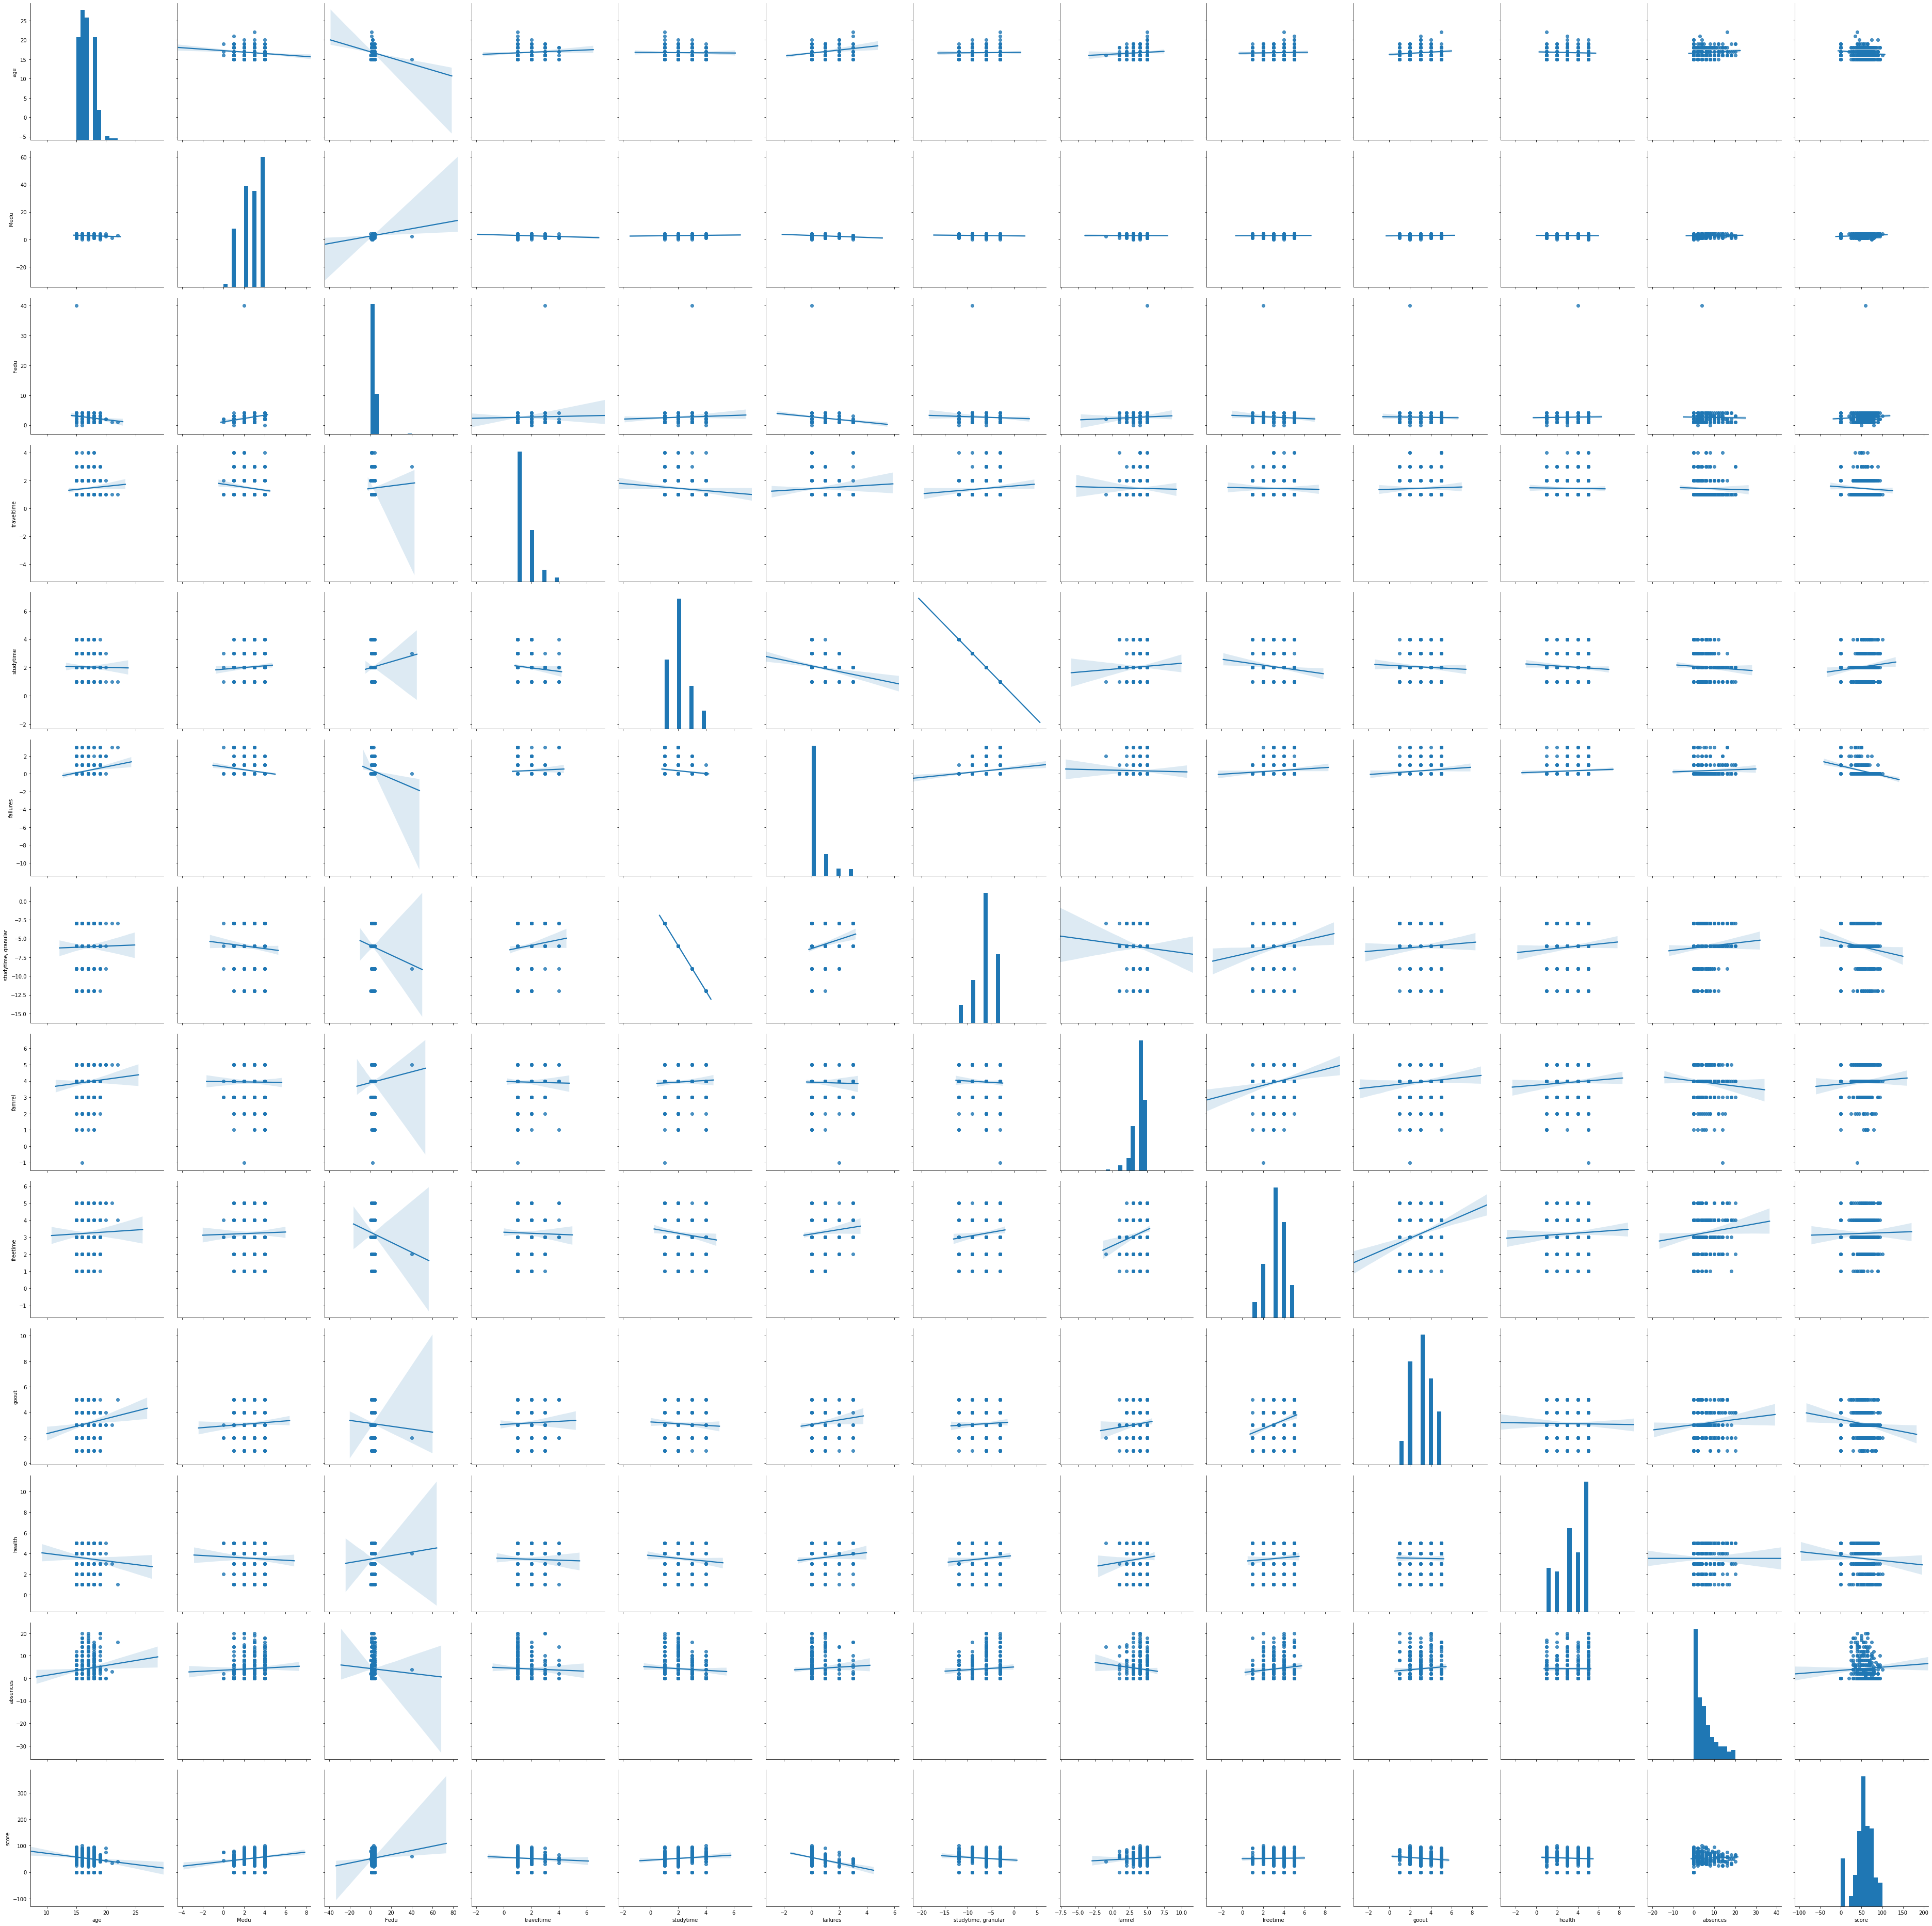

In [0]:
sns.pairplot(stud_set, kind='reg', height=4)
plt.show()

In [0]:
num_set = stud_set[['score', 'age', 'absences', 'medu', 'fedu', 'mjob',
                    'fjob', 'reason', 'guardian', 'traveltime',
                    'studytime', 'failures', 'famrel', 'freetime', 'goout',
                    'health']]

Используем для наглядности матрицу корреляций

In [0]:
corr_matrix = num_set.corr()
corr_matrix

,score,age,absences,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,health
score,1.000000,-0.155726,0.065986,0.209758,0.130923,-0.056535,0.114295,-0.337187,0.052902,0.017481,-0.127742,-0.073208
age,-0.155726,1.000000,0.119775,-0.146405,-0.152148,0.076013,-0.018019,0.206279,0.056941,0.013994,0.121057,-0.065719
absences,0.065986,0.119775,1.000000,0.054418,-0.047741,-0.033530,-0.060063,0.060398,-0.070487,0.104059,0.094116,0.002215
medu,0.209758,-0.146405,0.054418,1.000000,0.618881,-0.152597,0.079513,-0.239668,-0.003566,0.037699,0.071235,-0.054431
fedu,0.130923,-0.152148,-0.047741,0.618881,1.000000,-0.120544,0.017207,-0.268048,-0.016742,-0.015669,0.050636,0.010097
traveltime,-0.056535,0.076013,-0.033530,-0.152597,-0.120544,1.000000,-0.098226,0.035113,-0.029213,-0.016696,0.046390,-0.035852
studytime,0.114295,-0.018019,-0.060063,0.079513,0.017207,-0.098226,1.000000,-0.169399,0.037950,-0.122057,-0.053554,-0.072790
failures,-0.337187,0.206279,0.060398,-0.239668,-0.268048,0.035113,-0.169399,1.000000,-0.028517,0.087558,0.101036,0.082165
famrel,0.052902,0.056941,-0.070487,-0.003566,-0.016742,-0.029213,0.037950,-0.028517,1.000000,0.164830,0.069514,0.088845
freetime,0.017481,0.013994,0.104059,0.037699,-0.015669,-0.016696,-0.122057,0.087558,0.164830,1.000000,0.294450,0.063718


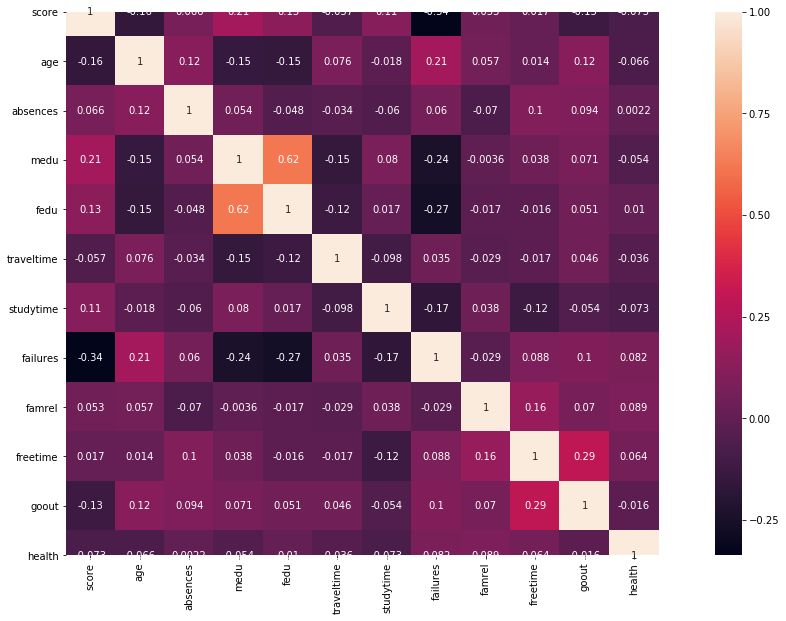

In [0]:
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, square=True)

Наибольшую корреляцию с целевым параметром 'score' показывают параметры 'fedu', 'medu', 'failures', 'age', 'studytime', 'goout', 'famrel', 'traveltime'. Из них параметры 'fedu' и 'medu' взаимно скоррелированы, поэтому оставлвяем только 'medu', как имеющего большую корреляцию с целевым показателем. Т.о. в итоговую выборку включаем:  'medu', 'failures', 'age', 'studytime', 'goout', 'famrel', 'traveltime'.

### Анализ номинативных параметров

In [0]:
# список номинативных переменных
nom_var = ['school', 'sex', 'address', 'famsize', 'pstatus', 'mjob',
           'fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
           'activities', 'nursery', 'higher', 'internet', 'romantic']

 Посмотрим различаются ли распределения целевого параметра 'score' в зависимости от значений  номинативных переменных. Сделаем это с помощью box-plot (график показывает плотность распределения переменных).

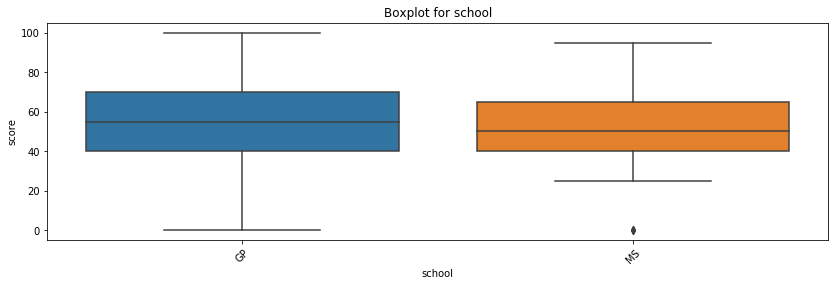

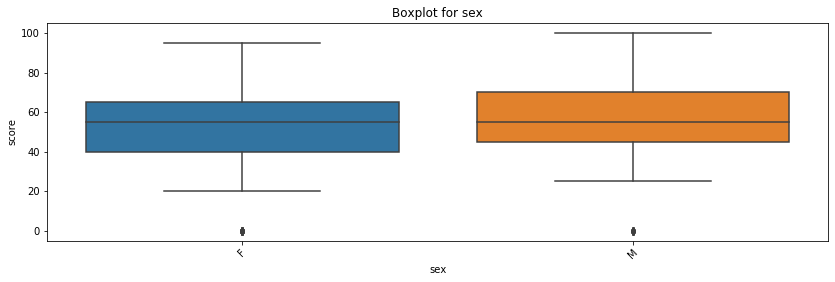

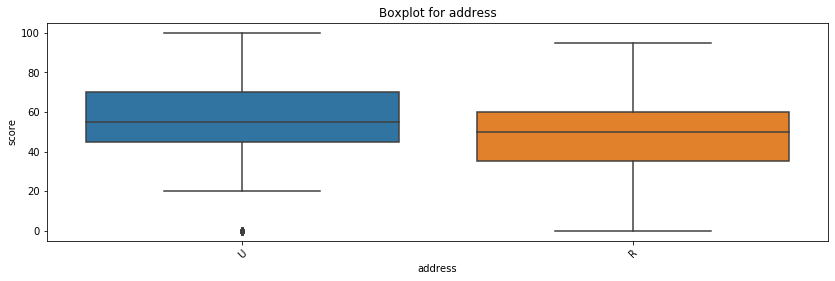

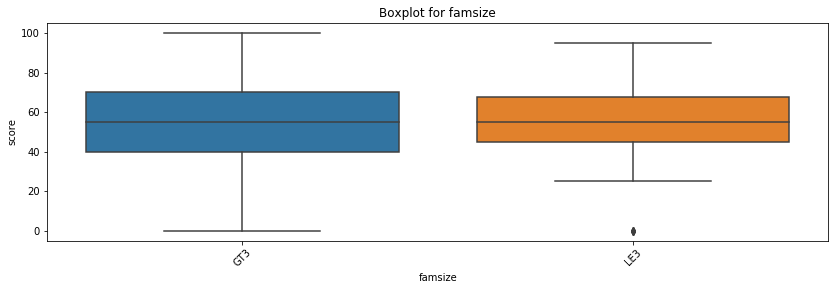

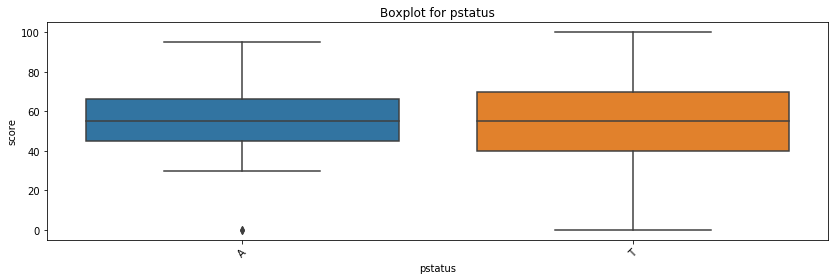

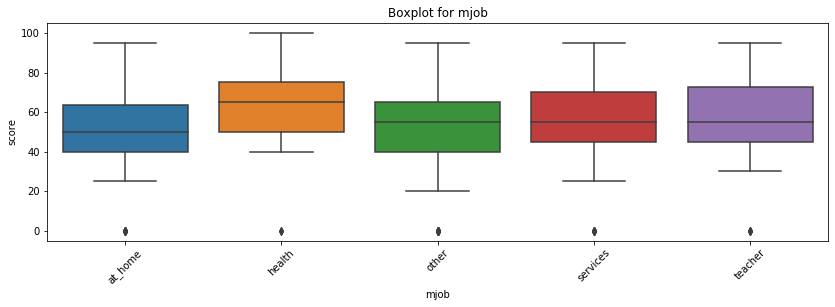

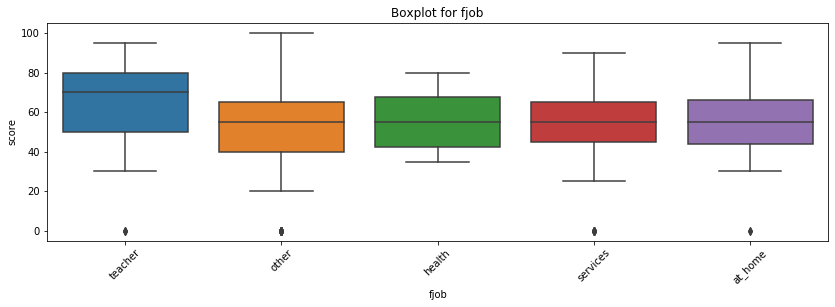

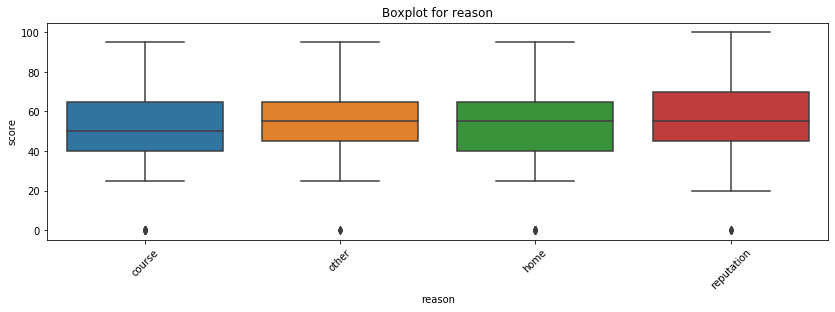

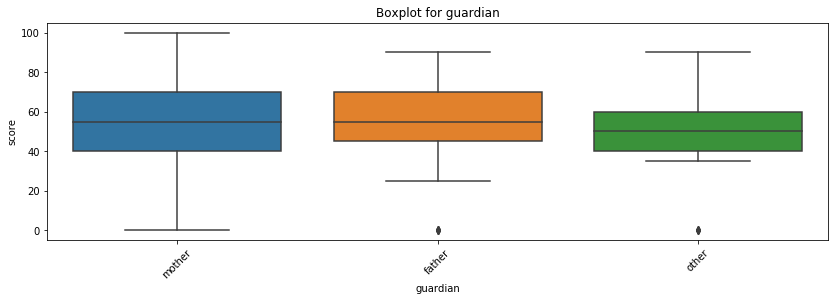

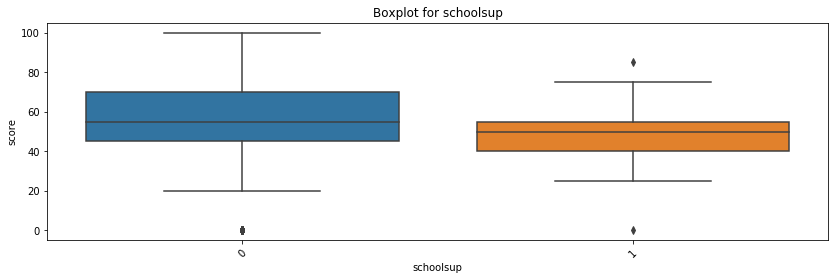

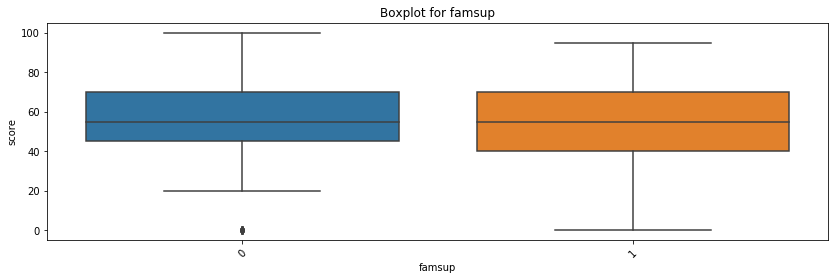

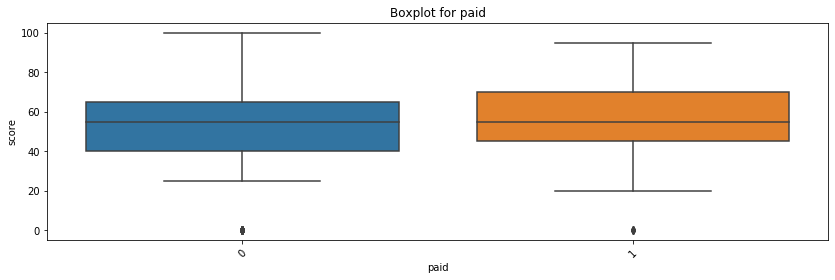

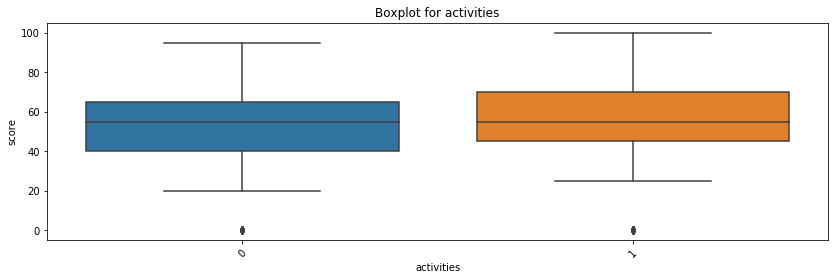

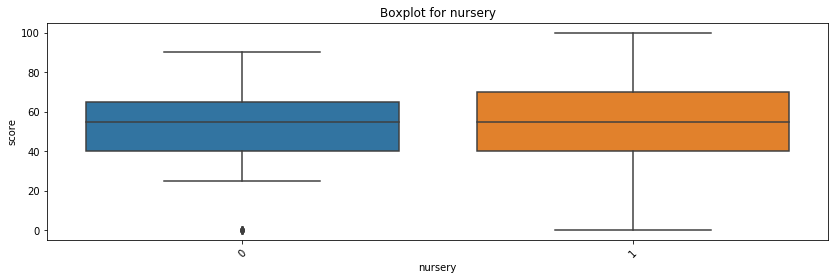

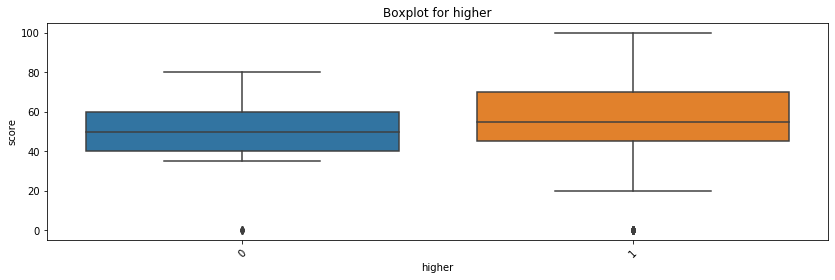

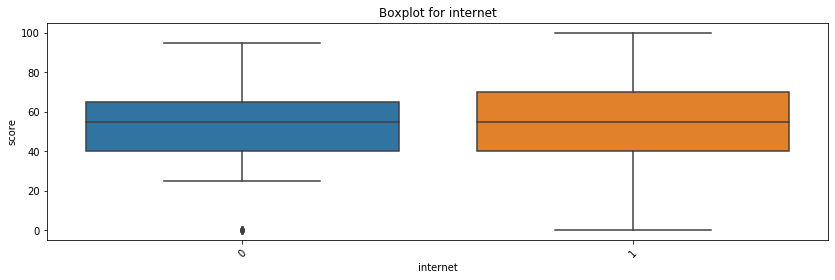

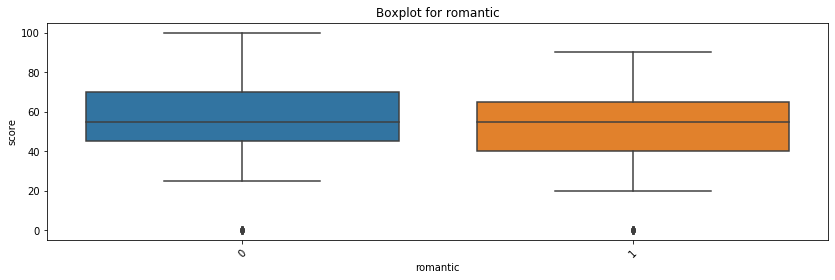

In [0]:
# графики Boxplot
for col in nom_var:
    get_boxplot(col)


Анализ графиков Boxplot с использованием сегментации раскрывает очевидные тенденции к усилению корреляцию в ряде случаев.

Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения 'score' по различным параметрам неразличимы:

In [0]:
# проводим тест Стьюдента
stat_difference_analyse(stud_set, nom_var, 'score', alpha=0.05)

['address', 'mjob', 'higher', 'romantic']


В ходе теста Стьюдента найдены статистически значимые различия для колонок 
'address', 'mjob', 'higher', 'romantic', изменение значений которых влияют на целевой параметр 'score'. 
Включаем эти параметры в итоговую выборку.


## Итоги работы

В ходе выполнения первой части был выполнен первичный анализ данных, а именно: проанализированы все переменные, определен их тип, выявлены пропущенные записи.

Датасет содержит 29 переменных, из них 3 - количественные, 9 - ранговых и 17 номинативных.

Максимальное количество пропущенных данных в столбцах не превосходит 12%.

В ходе первой части работы в данные были внесены изменения - исправление ошибочных данных, удаление выбросов, заполнение пропусков.

Было проведено несколько этапов исследований, в ходе которых был отобран комплекс параметров для последующего построения модели.

<li>'medu'</li> 
<li>'failures'</li>
<li>'age'</li>
<li>'studytime'</li>
<li>'goout'</li>
<li>'famrel'</li>
<li>'traveltime'</li>
<li>'address'</li>
<li>'mjob'</li>
<li>'higher'</li>
<li>'romantic'</li>

